In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio
from pathlib import Path
import toml

In [2]:
with open('paths_cfg.toml',mode='r') as f:
    paths = toml.load(f, _dict=dict)

**Hyperparameter search results**:`1500` epochs with mini-batches by `500` steps of fine tuning with complete dataset

In [3]:
csTE_array = np.array([0,0.1,0.5,1.0,2.0])
aE_array = np.array([0.1,0.5,1.0,2.0,5.0])

T_recon_mean = np.empty((csTE_array.size,aE_array.size))
E_recon_mean = np.empty((csTE_array.size,aE_array.size))
TE_dist_mean = np.empty((csTE_array.size,aE_array.size))
TE_dist_std = np.empty((csTE_array.size,aE_array.size))

TE_dist_mean_train = np.empty((csTE_array.size,aE_array.size))
TE_dist_std_train = np.empty((csTE_array.size,aE_array.size))

for i,csTE in enumerate(csTE_array):
    ad = int(csTE>0)
    csTE = str(csTE).replace('.','-')
    for j,aE in enumerate(aE_array):
        aE = str(aE).replace('.','-')
        temp_T=[]
        temp_E=[]
        temp_M=[]
        temp_TE=[]
        temp_TE_train=[]
        found_files=0
        for cv in range(0,44,1):
            file_id = f'NM_Edat_pcipfx_'+\
                      f'aT_1-0_aE_{aE}_cs_{csTE}_ad_{ad}_'+\
                      f'ld_3_bs_200_se_500_ne_1500_cv_{cv}_ri_0_500_ft.csv'
            if Path(paths['exp_hparam_log']+file_id).is_file(): 
                D = pd.read_csv(paths['exp_hparam_log']+file_id)
                temp_T.extend([float(D['val_mse_T'].values[-1])])
                temp_E.extend([float(D['val_mse_E'].values[-1])])
                temp_TE.extend([float(D['val_mse_TE'].values[-1])])
                temp_TE_train.extend([float(D['train_mse_TE'].values[-1])])
                found_files=1
            else:
                #Checks
                if 'cv_0' in file_id:
                    print(file_id,' not found!')
                
        if found_files==1:
            T_recon_mean[i,j]=np.mean(temp_T)
            E_recon_mean[i,j]=np.mean(temp_E)
            TE_dist_mean[i,j]=np.mean(temp_TE)
            TE_dist_std[i,j]=np.std(temp_TE)
            TE_dist_mean_train[i,j]=np.mean(temp_TE_train)
            TE_dist_std_train[i,j]=np.std(temp_TE_train)
        else:
            T_recon_mean[i,j]=np.nan
            E_recon_mean[i,j]=np.nan
            TE_dist_mean[i,j]=np.nan
            TE_dist_std[i,j]=np.nan
            TE_dist_mean_train[i,j]=np.nan
            TE_dist_std_train[i,j]=np.nan

NM_Edat_pcipfx_aT_1-0_aE_0-1_cs_0-0_ad_0_ld_3_bs_200_se_500_ne_1500_cv_0_ri_0_500_ft.csv  not found!
NM_Edat_pcipfx_aT_1-0_aE_0-5_cs_0-0_ad_0_ld_3_bs_200_se_500_ne_1500_cv_0_ri_0_500_ft.csv  not found!
NM_Edat_pcipfx_aT_1-0_aE_2-0_cs_0-0_ad_0_ld_3_bs_200_se_500_ne_1500_cv_0_ri_0_500_ft.csv  not found!
NM_Edat_pcipfx_aT_1-0_aE_5-0_cs_0-0_ad_0_ld_3_bs_200_se_500_ne_1500_cv_0_ri_0_500_ft.csv  not found!


In [4]:
sns.set()
sns.set_style('ticks',{'axes.grid' : False}) 
%matplotlib inline

In [5]:
def plot_heatmap(ax,M,Xarr,Yarr,Xlabel=r'$\lambda_{te}$',Ylabel=r'$\alpha_{e}$',title='T recon',c=(0,1)):
    im = ax.imshow(M.T,vmin = c[0],vmax=c[1],cmap='viridis')
    ax.set_xticks(np.arange(len(Xarr)))
    ax.set_yticks(np.arange(len(Yarr)))
    ax.set_xticklabels(Xarr)
    ax.set_yticklabels(Yarr)
    ax.set_xlabel(r'$\lambda_{te}$')
    ax.set_ylabel(Ylabel)
    for i in range(Xarr.size):
        for j in range(Yarr.size):
            text = ax.text(i, j, '{:0.3f}'.format(M[i, j]),
                           ha="center", va="center", color="w")
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    ax.grid(False)
    ax.set_title(title)
    
    return

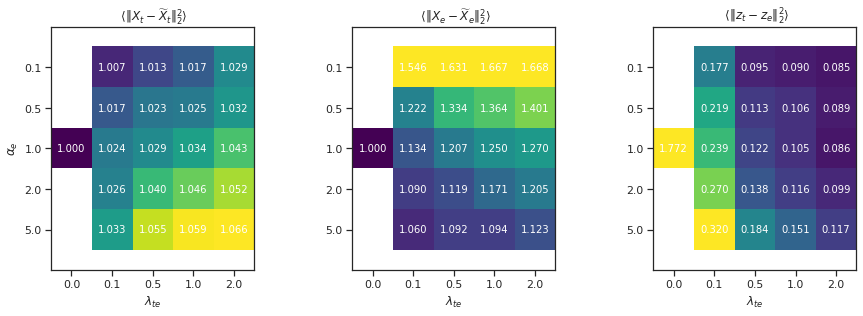

In [6]:
fig, ax = plt.subplots(1,3,figsize=(13,4.5))
plot_heatmap(ax=ax[0],M=T_recon_mean/np.nanmean(T_recon_mean[0,:]),Xarr=csTE_array,Yarr=aE_array,Xlabel=r'$\lambda_{te}$',Ylabel=r'$\alpha_{e}$',title=r' $ \langle \Vert X_{t} -  \widetilde{X}_{t} \Vert_2^2 \rangle $',c=(1.0,1.06))
plot_heatmap(ax=ax[1],M=E_recon_mean/np.nanmean(E_recon_mean[0,:]),Xarr=csTE_array,Yarr=aE_array,Xlabel=r'$\lambda_{te}$',Ylabel='',title=r' $ \langle \Vert X_{e} -  \widetilde{X}_{e} \Vert_2^2 \rangle $',c=(1.0,1.5))
plot_heatmap(ax=ax[2],M=TE_dist_mean,Xarr=csTE_array,Yarr=aE_array,Xlabel=r'$\lambda_{te}$',Ylabel='',title=r' $ \langle \Vert z_{t} -  z_{e} \Vert_2^2 \rangle $',c=(0.07,0.32))
plt.tight_layout()
plt.savefig('../assets/Fig_ED_3.jpg',dpi=300)